# An Analysis on Titanic passenger survival

This analysis is a combination of the creator's own writing and the tools given in class

The overall steps include
1. Basic Glimpse and visualizations of the imported data
2. Visualizations
    - Visualizing feature and survival relationsip (Include plots and statistical analysis)
    - Creating and analyzing new features
    - Calculate correlation between all the features 
3. Hypothesis
4. Dealing with Missing Data
5. Prepare and perform predictions using classifiers for two different datasets
    - K neighbor
    - Random Forest
    - Gradient Boosting
6. Conclusion

Here is a quick list of things I changed compared to the sample file from class:
1. Created and changed some visualizations
2. Added statistical analysis (Kolmogorov–Smirnov test and Chi-square)
3. Different missing data handling
4. Added a gradient boosting classifier

# 1.Basic Glimpse and visualizations of the imported data

In [1]:
# Basic libs
import pandas as pd
import numpy as np

# Plotting libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from IPython.display import display, HTML
from IPython.display import Math, Latex

# ML Libs
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import cross_validate, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Stat Libs
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
# Importing training and testing data 
train_df = pd.read_csv("./03-titanic/03-titanic/data/train.csv")
test_df = pd.read_csv("./03-titanic/03-titanic/data/test.csv")

In [3]:
# A glimpse of what the data looks like
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.info()
# From here we see that there are 12 columns and 891 rows in total in the train dataset
# Age and Cabin Columns have nulls inside

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Some Basic Descriptive Statistics of some columns in the data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


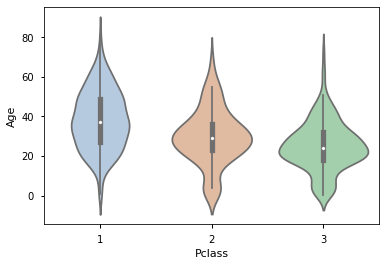

In [6]:
# Age distribution between the three classes
# We can see that Class 1 has highest median age while Class 3 has lowest median age
sns.violinplot(x="Pclass", y="Age", data=train_df, split=True, palette='pastel', saturation=0.5)

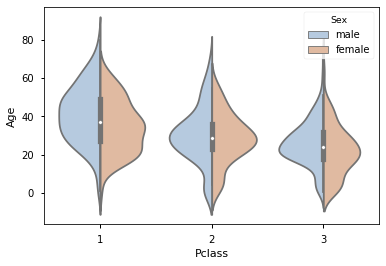

In [7]:
sns.violinplot(x="Pclass", y="Age", hue="Sex", data=train_df, split=True, palette='pastel', saturation=0.5)
# We can see from this plot that mean male age differs more compared to mean female age when comparing the 3 classes

# 2. Visualizations

### 2a. Visualizing feature and survival relationsip

In [8]:
## Question 1: How is survival influenced based on the features in the dataset?

In [9]:
#### Pclass
#### Age
#### Gender
#### Embarked
#### SibSp
#### Parch
#### Fare

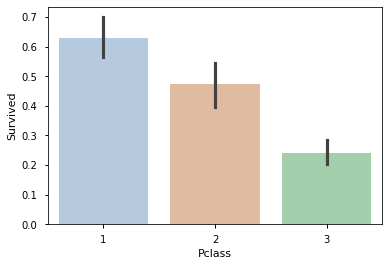

In [10]:
sns.barplot(x="Pclass", y="Survived", data=train_df, palette='pastel', saturation=0.5)
# From this plot we can see that Class 1 is much more likely to survive compared to class 3

In [11]:
obs = pd.crosstab(train_df['Survived'].dropna(),
                            train_df['Pclass'].dropna())
chi,p,dof,exp = chi2_contingency(obs)
print(obs)
print('-----------------------')
print(p)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
-----------------------
4.549251711298793e-23


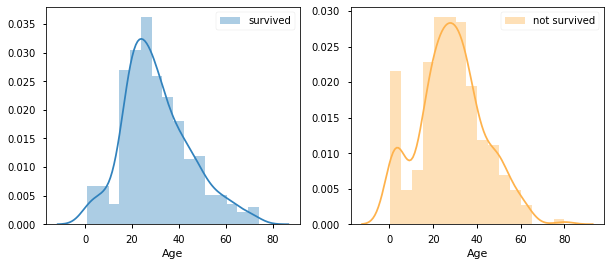

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.distplot(train_df[train_df['Survived']==0].Age.dropna(),ax=axes[0], color="#3182bd", label='survived')
axes[0].legend()
sns.distplot(train_df[train_df['Survived']==1].Age.dropna(),ax=axes[1], color="#feb24c", label='not survived')
axes[1].legend()

# From here it seems as if the highest peak of both age distributions for survived and not survived are around 20-30 years.
# However, there is a noticible peak in numbers around 0-10 years in the survived graph

In [13]:
ks_stat, ks_p = stats.ks_2samp(train_df[train_df['Survived']==0].Age.dropna(), train_df[train_df['Survived']==1].Age.dropna())
ks_p

0.1255558124005897

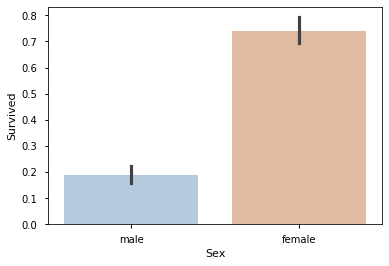

In [14]:
sns.barplot(x="Sex", y="Survived", data=train_df, palette='pastel', saturation=0.5)
# From this plot we can see that females seem much more likely to survive compared to males

In [15]:
obs = pd.crosstab(train_df['Survived'].dropna(),
                  train_df['Sex'].dropna())
chi,p,dof,exp = chi2_contingency(obs)
print(obs)
print('-----------------------')
print(p)

Sex       female  male
Survived              
0             81   468
1            233   109
-----------------------
1.1973570627755645e-58


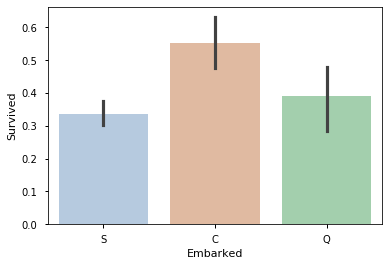

In [16]:
sns.barplot(x="Embarked", y="Survived", data=train_df, palette='pastel', saturation=0.5)
# From this plot it seems that embarking on port C may have highest survival

In [17]:
obs = pd.crosstab(train_df['Survived'].dropna(),
                  train_df['Embarked'].dropna())
chi,p,dof,exp = chi2_contingency(obs)
print(obs)
print('-----------------------')
print(p)

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
-----------------------
1.769922284120912e-06


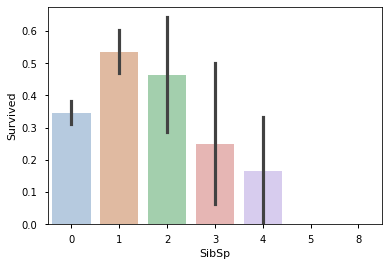

In [18]:
sns.barplot(x="SibSp", y="Survived", data=train_df, palette='pastel', saturation=0.5)
# From this plot we can see that the amount of sibling/spouse a passenger has may affect survival

In [19]:
obs = pd.crosstab(train_df['Survived'].dropna(),
                  train_df['SibSp'].dropna())
chi,p,dof,exp = chi2_contingency(obs)
print(obs)
print('-----------------------')
print(p)

SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0
-----------------------
1.5585810465902116e-06


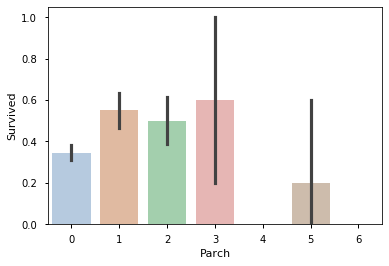

In [20]:
sns.barplot(x="Parch", y="Survived", data=train_df, palette='pastel', saturation=0.5)
# From this plot we can see that Parent/Child amount may or may not influence survival

In [21]:
obs = pd.crosstab(train_df['Survived'].dropna(),
                  train_df['Parch'].dropna())
chi,p,dof,exp = chi2_contingency(obs)
print(obs)
print('-----------------------')
print(p)

Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0
-----------------------
9.703526421039997e-05


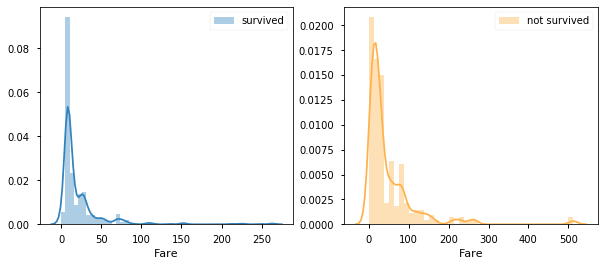

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.distplot(train_df[train_df['Survived']==0].Fare.dropna(),ax=axes[0], color="#3182bd", label='survived')
axes[0].legend()
sns.distplot(train_df[train_df['Survived']==1].Fare.dropna(),ax=axes[1], color="#feb24c", label='not survived')
axes[1].legend()

# From here it seems that having a higher Fare does not help in survival

In [23]:
ks_stat, ks_p = stats.ks_2samp(train_df[train_df['Survived']==0].Fare.dropna(), train_df[train_df['Survived']==1].Fare.dropna())
ks_p

1.8678359776799793e-17

### 2b. Creating and analyzing new features - 'relatives' , 'alone', and 'deck'

In [24]:

def header(title, width=100):
    fmt_title = title + '&nbsp;' * (width - len(title))
    tpl = '<table style="width:{width}"><tr><th>{title}</th></tr></table>'
    html = tpl.format(title=fmt_title, width=width)
    return HTML(html)


data = [(' Train', train_df), (' Test', test_df)]
for label, dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'alone'] = 'Yes'
    counted = dataset['alone'].value_counts().to_frame()
    display(header(label, 70))
    display(counted)


Train


,alone
Yes,537
No,354


Test


,alone
Yes,253
No,165


In [25]:
# Using regex in python
import re
def extract_1(cabin): 
    return re.compile("([A-Z]+)", re.IGNORECASE).search(cabin).group()

def extract_2(cabin): 
    return re.compile("([a-zA-Z]+)").search(cabin).group()

print(extract_1('UA1223'))
print(extract_2('UA1223'))



UA
UA


In [26]:
import re
# Mapping first char to a specific location in the boat.
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
new_train = train_df
new_test = test_df
data = [new_train, new_test]

def extract_letter_prefix(x):
    return re.compile("([a-zA-Z]+)").search(x).group()

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")   # Setting U0 Cabin if unknown.
    dataset['Deck'] = dataset['Cabin'].map(extract_letter_prefix)
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# Drop the cabin as we already extracted Deck.
new_train = new_train.drop(['Cabin'], axis=1)
new_test = new_test.drop(['Cabin'], axis=1)


#### 2b-continued. Visualizing relationship of "Survival" and the new features

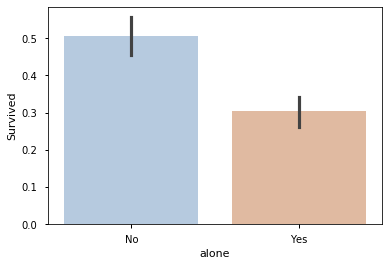

In [27]:
sns.barplot(x="alone", y="Survived", data=train_df, palette='pastel', saturation=0.5)
# From this plot we can see being alone has lower chances of survival, hence the new 'alone' feature will be considered to add into the prediction model

In [28]:
obs = pd.crosstab(train_df['Survived'].dropna(),
                  train_df['alone'].dropna())
chi,p,dof,exp = chi2_contingency(obs)
print(obs)
print('-----------------------')
print(p)

alone      No  Yes
Survived          
0         175  374
1         179  163
-----------------------
1.9726543846517183e-09


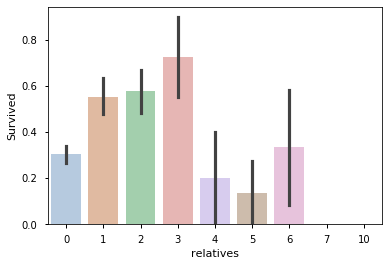

In [29]:
sns.barplot(x="relatives", y="Survived", data=train_df, palette='pastel', saturation=0.5)

In [30]:
obs = pd.crosstab(train_df['Survived'].dropna(),
                  train_df['relatives'].dropna())
chi,p,dof,exp = chi2_contingency(obs)
print(obs)
print('-----------------------')
print(p)

relatives   0   1   2   3   4   5   6   7   10
Survived                                      
0          374  72  43   8  12  19   8   6   7
1          163  89  59  21   3   3   4   0   0
-----------------------
3.579668975443533e-14


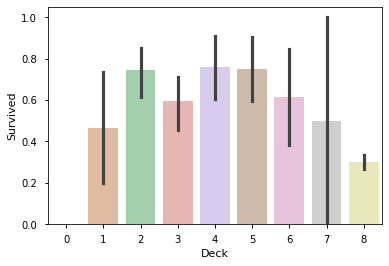

In [31]:
sns.barplot(x="Deck", y="Survived", data=train_df, palette='pastel', saturation=0.5)

In [32]:
obs = pd.crosstab(train_df['Survived'].dropna(),
                  train_df['Deck'].dropna())
chi,p,dof,exp = chi2_contingency(obs)
print(obs)
print('-----------------------')
print(p)

Deck      0  1   2   3   4   5  6  7    8
Survived                                 
0         1  8  12  24   8   8  5  2  481
1         0  7  35  35  25  24  8  2  206
-----------------------
6.326020042314704e-18


### 2c. Calculate correlation between all the features 

In [33]:
# Numeric Features
numeric_features = ['Age', 'Fare']
# Categorical Features
ordinal_features = ['Pclass', 'SibSp', 'Parch','relatives','alone']
nominal_features = ['Sex', 'Embarked','Deck']

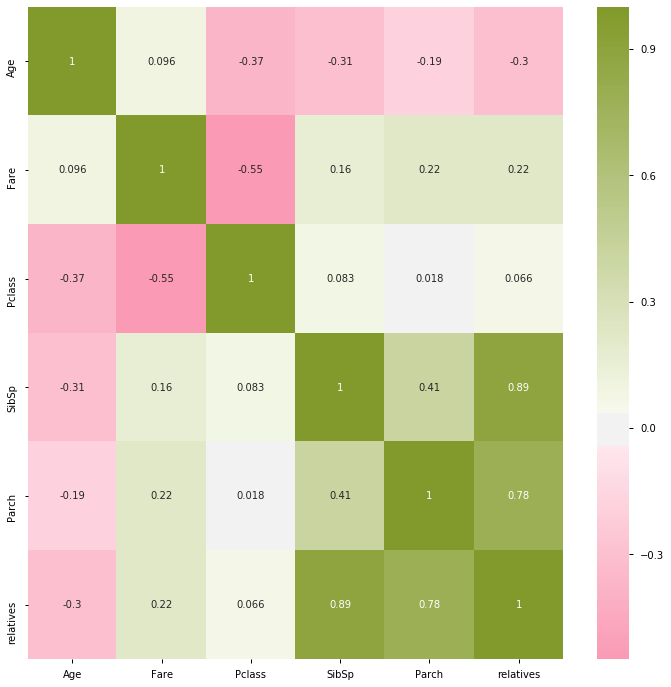

In [34]:
cor_matrix = new_train[numeric_features + ordinal_features].corr().round(3)
# Draw a heatmap 
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=True, center=0, 
            cmap = sns.diverging_palette(0, 100, 90, 60, as_cmap=True),
            ax=plt.subplot(111));
plt.show()

# 3. Hypothesis 

From the the results of the KS and chi-square tests, it seems that only age does not reject the null hypothesis. All the other features p-values reject null hypothesis so will be considered to not be of no influence to survival. A hypothesis of "Age is not an important feature for survival" will be made here.

We will use two datasets to test whether age is an important feature or not. One dataset including all features and the other including all features but age to run K neighbor/ Random Forest/ Gradient Boosting Classifiers to predict survival. If there is significant difference for all models in prediction capability, then a clearer picture of whether age is important or not could be seen.

# 4. Dealing with Missing Data

In [35]:
new_train.info()
# From here we can see that Age has a lot of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
relatives      891 non-null int64
alone          891 non-null object
Deck           891 non-null int32
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 94.1+ KB


In [36]:
'''
# Original Method: populate age with a random distribution centered on 'mean' value with 'std' spread.
data = [new_train,  new_test]

for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
new_train["Age"].isnull().sum()
'''

'\n# Original Method: populate age with a random distribution centered on \'mean\' value with \'std\' spread.\ndata = [new_train,  new_test]\n\nfor dataset in data:\n    mean = dataset["Age"].mean()\n    std = dataset["Age"].std()\n    is_null = dataset["Age"].isnull().sum()\n    # compute random numbers between the mean, std and is_null\n    rand_age = np.random.randint(mean - std, mean + std, size = is_null)\n    # fill NaN values in Age column with random values generated\n    age_slice = dataset["Age"].copy()\n    age_slice[np.isnan(age_slice)] = rand_age\n    dataset["Age"] = age_slice\n    dataset["Age"] = dataset["Age"].astype(int)\nnew_train["Age"].isnull().sum()\n'

In [37]:
# Due to the visualization results, we can assume that the distribution of age is different for the three passenger classes
# In this step, we will populate age from a normal distribution for each passenger class

datac1 = new_train[new_train['Pclass']==1]
datac2 = new_train[new_train['Pclass']==2]
datac3 = new_train[new_train['Pclass']==3]

datatestc1 = new_test[new_test['Pclass']==1]
datatestc2 = new_test[new_test['Pclass']==2]
datatestc3 = new_test[new_test['Pclass']==3]

data_stratified = [datac1, datac2, datac3 , datatestc1, datatestc2, datatestc3]

for dataset in data_stratified:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers from a normal distribution of the mean, std and is_null
    rand_age = np.random.normal(mean, std, size = is_null).astype(int)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)


C:\Users\Catherine Liao\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Catherine Liao\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
new_train2= pd.concat([datac1,datac2,datac3])
new_test2 = pd.concat([datatestc1,datatestc2,datatestc3])

In [39]:
# Dropping empty embarked data
print('--- Drop train records with empty Embarked ---')
print('# Recs before: {0}'.format(new_train2.shape[0]))

new_train2 = new_train2.dropna()

print('# Recs after : {0}'.format(new_train2.shape[0]))

--- Drop train records with empty Embarked ---
# Recs before: 891
# Recs after : 889


In [40]:
new_train = new_train2
new_test = new_test2

In [41]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 890
Data columns (total 14 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null int32
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
relatives      889 non-null int64
alone          889 non-null object
Deck           889 non-null int32
dtypes: float64(1), int32(2), int64(6), object(5)
memory usage: 97.2+ KB


In [42]:
# Changing type from float64 to int32
new_train['Fare'] = new_train['Fare'].fillna(0).astype(int)

print(' ')
print('--- Drop test records with empty Fare ---')
print('# Recs before: {0}'.format(new_test.shape[0]))
new_test = new_test[new_test['Fare'].notna()]
new_test['Fare'] = new_test['Fare'].astype(int)
print('# Recs after : {0}'.format(new_test.shape[0]))


 
--- Drop test records with empty Fare ---
# Recs before: 418
# Recs after : 417


C:\Users\Catherine Liao\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 5. Prepare and perform predictions for two different datasets

In [43]:
# First we prepare the first dataset using all features. 
# Make sure we get reproducible results.
import random
random.seed(1234)

def model_x_df(df):
    predictors = ['Pclass', 'Age', 'Parch', 'Fare', 'relatives']
    data_x = df[predictors].copy()
    data_sex_x = pd.get_dummies(df.Sex, prefix='sex')
    data_alone_x = pd.get_dummies(df.alone, prefix='alone')
    data_embarked_x = pd.get_dummies(df.Embarked, prefix='emb')
    data_deck_x = pd.get_dummies(df.Deck, prefix='deck')
    result = pd.concat(
        [data_x, data_sex_x, data_alone_x, data_embarked_x, data_deck_x], axis=1)
    required_fields = [
        'Pclass', 'Age', 'Parch', 'Fare', 'relatives', 
        'sex_female', 'sex_male',
        'alone_No', 'alone_Yes', 
        'emb_C', 'emb_Q', 'emb_S', 
        'deck_0', 'deck_1', 'deck_2', 'deck_3', 'deck_4', 'deck_5', 'deck_6', 'deck_7', 'deck_8']
    for req_field in required_fields:
        if req_field not in result.columns:
             result[req_field] = 0
    # Make sure the fields are ordered the same way.
    return result[required_fields]

def model_y_1d(df):
    return df['Survived'].values.ravel()

train_x = model_x_df(new_train)
train_y = model_y_1d(new_train)

test_x = model_x_df(new_test)
test_y = model_y_1d(new_test)

print(train_x.shape)
print(test_x.shape)

(889, 21)
(417, 21)


### 5a. Using K Neighbors Classifier to predict survival

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = BaggingClassifier(
    KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging = clf.fit(train_x, train_y)

In [45]:
def print_score(title, mean_score):
    print('{0} = {1:.1f}%'.format(title, mean_score*100))

In [46]:
# Basic - Cross Validation without optimization
# Did 10-fold instead of 5
cv_scores = cross_val_score(bagging, train_x, train_y, cv=10)
print_score('Simple Cross-Validation Score', cv_scores.mean())

Simple Cross-Validation Score = 74.1%


In [47]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 7 to 417
Data columns (total 21 columns):
Pclass        417 non-null int64
Age           417 non-null int32
Parch         417 non-null int64
Fare          417 non-null int32
relatives     417 non-null int64
sex_female    417 non-null uint8
sex_male      417 non-null uint8
alone_No      417 non-null uint8
alone_Yes     417 non-null uint8
emb_C         417 non-null uint8
emb_Q         417 non-null uint8
emb_S         417 non-null uint8
deck_0        417 non-null int64
deck_1        417 non-null uint8
deck_2        417 non-null uint8
deck_3        417 non-null uint8
deck_4        417 non-null uint8
deck_5        417 non-null uint8
deck_6        417 non-null uint8
deck_7        417 non-null uint8
deck_8        417 non-null uint8
dtypes: int32(2), int64(4), uint8(15)
memory usage: 25.7 KB


In [48]:
# The test score for the model without optimization.
# Notice that as expected the score for testing is a little smaller than the score for training.
test_score = clf.score(test_x, test_y)
print('Most important score!')
print_score('Test Score', test_score)

Most important score!
Test Score = 69.5%


### 5b. Perform Random Forest 

In [49]:
import random
random.seed(2022)
hyperF = dict(
    n_estimators = [300, 500, 600, 700], 
    max_depth = [5, 8, 10, 15],  
    min_samples_split = [2, 5, 10, 15, 100], 
    min_samples_leaf = [2, 5, 8, 12])
forest = RandomForestClassifier(random_state = 1)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_x, train_y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.6min finished
C:\Users\Catherine Liao\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
prms = bestF.best_params_
print('Best Hyperparameter Combination')
print('-' * 40)
print('Max Depth = {0}'.format(prms['max_depth']))
print('Min Samples Leaf  = {0}'.format(prms['min_samples_leaf']))
print('Min Samples Split = {0}'.format(prms['min_samples_split']))
print('Number of Estimators= {0}'.format(prms['n_estimators']))

Best Hyperparameter Combination
----------------------------------------
Max Depth = 5
Min Samples Leaf  = 12
Min Samples Split = 100
Number of Estimators= 300


In [51]:
rf_clf = RandomForestClassifier(
    random_state = 1, 
    max_depth = prms['max_depth'],
    n_estimators = prms['n_estimators'],
    min_samples_split = prms['min_samples_split'],
    min_samples_leaf = prms['min_samples_leaf'])
random_forest = rf_clf.fit(train_x, train_y)
scores = cross_val_score(random_forest, train_x, train_y, cv=5)
print_score('CV score after Grid Seach', scores.mean())

CV score after Grid Seach = 74.8%


In [52]:
test_score = rf_clf.score(test_x, test_y)
print('Final score after optimization')
print_score('Test Score', test_score)

Final score after optimization
Test Score = 75.1%


### 5c. Perform Gradient Boosting Classifier

In [53]:
import random
random.seed(2022)
hyperF = dict(
    n_estimators = [300, 500, 600, 700], 
    max_depth = [5, 8, 10, 15])
forest = GradientBoostingClassifier(random_state = 1)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_x, train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   12.5s finished
C:\Users\Catherine Liao\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
rf_clf = GradientBoostingClassifier(
    random_state = 1, 
    max_depth = prms['max_depth'],
    n_estimators = prms['n_estimators'])
random_forest = rf_clf.fit(train_x, train_y)
scores = cross_val_score(random_forest, train_x, train_y, cv=5)
print_score('CV score after Grid Seach', scores.mean())

CV score after Grid Seach = 70.5%


In [55]:
test_score = rf_clf.score(test_x, test_y)
print('Final score after optimization')
print_score('Test Score', test_score)

Final score after optimization
Test Score = 69.5%


### 5d. Using Data only all the features except for Age and running prediction models

In [56]:
# Make sure we get reproducible results.
import random
random.seed(1234)

def model_x_df(df):
    predictors = ['Pclass', 'Parch', 'Fare', 'relatives']
    data_x = df[predictors].copy()
    data_sex_x = pd.get_dummies(df.Sex, prefix='sex')
    data_alone_x = pd.get_dummies(df.alone, prefix='alone')
    data_embarked_x = pd.get_dummies(df.Embarked, prefix='emb')
    data_deck_x = pd.get_dummies(df.Deck, prefix='deck')
    result = pd.concat(
        [data_x, data_sex_x, data_alone_x, data_embarked_x, data_deck_x], axis=1)
    required_fields = [
        'Pclass', 'Parch', 'Fare', 'relatives', 
        'sex_female', 'sex_male',
        'alone_No', 'alone_Yes', 
        'emb_C', 'emb_Q', 'emb_S', 
        'deck_0', 'deck_1', 'deck_2', 'deck_3', 'deck_4', 'deck_5', 'deck_6', 'deck_7', 'deck_8']
    for req_field in required_fields:
        if req_field not in result.columns:
             result[req_field] = 0
    # Make sure the fields are ordered the same way.
    return result[required_fields]

def model_y_1d(df):
    return df['Survived'].values.ravel()

train_x = model_x_df(new_train)
train_y = model_y_1d(new_train)

test_x = model_x_df(new_test)
test_y = model_y_1d(new_test)

print(train_x.shape)
print(test_x.shape)

(889, 20)
(417, 20)


In [57]:
clf = BaggingClassifier(
    KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging = clf.fit(train_x, train_y)

In [58]:
# Basic - Cross Validation without optimization
# Did 10-fold instead of 5
cv_scores = cross_val_score(bagging, train_x, train_y, cv=10)
print_score('Simple Cross-Validation Score', cv_scores.mean())

Simple Cross-Validation Score = 74.1%


In [59]:
# The test score for the model without optimization.
# Notice that as expected the score for testing is a little smaller than the score for training.
test_score = clf.score(test_x, test_y)
print('Most important score!')
print_score('Test Score', test_score)

Most important score!
Test Score = 71.7%


In [60]:
random.seed(2022)
hyperF = dict(
    n_estimators = [300, 500, 600, 700], 
    max_depth = [5, 8, 10, 15],  
    min_samples_split = [2, 5, 10, 15, 100], 
    min_samples_leaf = [2, 5, 8, 12])
forest = RandomForestClassifier(random_state = 1)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_x, train_y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.7min finished
C:\Users\Catherine Liao\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
prms = bestF.best_params_
print('Best Hyperparameter Combination')
print('-' * 40)
print('Max Depth = {0}'.format(prms['max_depth']))
print('Min Samples Leaf  = {0}'.format(prms['min_samples_leaf']))
print('Min Samples Split = {0}'.format(prms['min_samples_split']))
print('Number of Estimators= {0}'.format(prms['n_estimators']))

Best Hyperparameter Combination
----------------------------------------
Max Depth = 8
Min Samples Leaf  = 12
Min Samples Split = 100
Number of Estimators= 500


In [62]:
rf_clf = RandomForestClassifier(
    random_state = 1, 
    max_depth = prms['max_depth'],
    n_estimators = prms['n_estimators'],
    min_samples_split = prms['min_samples_split'],
    min_samples_leaf = prms['min_samples_leaf'])
random_forest = rf_clf.fit(train_x, train_y)
scores = cross_val_score(random_forest, train_x, train_y, cv=5)
print_score('CV score after Grid Seach', scores.mean())

CV score after Grid Seach = 74.9%


In [63]:
test_score = rf_clf.score(test_x, test_y)
print('Final score after optimization')
print_score('Test Score', test_score)

Final score after optimization
Test Score = 74.8%


In [64]:
random.seed(2022)
hyperF = dict(
    n_estimators = [300, 500, 600, 700], 
    max_depth = [5, 8, 10, 15])
forest = GradientBoostingClassifier(random_state = 1)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_x, train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   13.8s finished
C:\Users\Catherine Liao\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
rf_clf = GradientBoostingClassifier(
    random_state = 1, 
    max_depth = prms['max_depth'],
    n_estimators = prms['n_estimators'])
random_forest = rf_clf.fit(train_x, train_y)
scores = cross_val_score(random_forest, train_x, train_y, cv=5)
print_score('CV score after Grid Seach', scores.mean())

CV score after Grid Seach = 71.5%


In [66]:
test_score = rf_clf.score(test_x, test_y)
print('Final score after optimization')
print_score('Test Score', test_score)

Final score after optimization
Test Score = 73.1%


# 6. Findings and Conclusion

- Excluding age seemed to improve test scores for some models while lowering test scores in another.
- Random Forest model performed the best out of the three.

K-neighbor results (no grid search)
Dataset 1                 Dataset 2
CV score 1: 74.1    vs    CV score 2: 74.1
Test score 1: 69.5    vs    Test score 2: 71.7

For the Random Forest results (with grid search)
Dataset 1                 Dataset 2 
CV score 1: 74.8    vs    CV score 2: 74.9
Test score 1: 75.1    vs    Test score 2: 74.8

For the Gradient Boosting results (with grid search)
Dataset 1                 Dataset 2
CV score 1: 70.5    vs    CV score 2: 71.5
Test score 1: 69.5    vs    Test score 2: 73.1

Conclusion: From this exploratory analysis, contrary to common belief of survival on the Titanic, it seemed as if intially the effect of age was not significant when comparing survived and not survived population's age distributions using KS test. Two different datasets, one with and the other without the age feature were made and used to predict survival. Overall excluding age seemed to improve test scores for some models while lowering test scores in another. However, the overall change in scores were not that big to begin with hence it is suggested that further stratification of data for analysis should be done to reach a clearer conclusion of the effects of age on survival.

# Future Work and Extra notes

- May have to look up more information regarding parameters related to gradient boosting classifier to see improvement in scores.

- Not entirely sure if statistical tests were used correctly but still wanted to try it out.

- The way of handling missing data (sampling from normal distributions of age per class) may have not been most accurate method. However again, still wanted to try it out.

- Using Grid Search may have made the notion of comparing different models or different datasets unsuitable since different parameters would have been used for same types of classifiers.

- Some CV scores show lower scores than test scores. Might have to search up why it's like that.